# Advisory report
___
<pre>Teamname    : Submission Impossible 💥  
Group nr    : 32 - Company C  
Students    : {Andrei Dragomir, Ece Doganer, Márk Kerekes, Ariana Vargas Pastor}  
Student nrs : {2669304,         2552855,     2696796,      2710153}  </pre>
___

#### Structure of the project:
1. Data Exploration:
- Data visualisation;
- Comparisons of our company's hiree distributions as opposed to those of the other companies;
- Hiree descriptive data distributions (based on gender, age, nationality and sports) compared to the distributions of all applicants for company C.

2. Modelling:
- Model M1: Neural Network with single hidden layer and no drop-out
    - Only use 4 out of the 8 given indicators
    - Optional: Using a clustering algorithm based on all indicators prior to the deployment of the classification model
- Model M2: Predictive model based on any indicators
    - Does the model perform better than M1?
    - Explanation of the training and testing methods
    - Explanation of the choice of indicators
- Model M3: Model based only on the given descriptors (age, nationality, gender and sports)
    - Evaluate model
    - Discuss whether using this model is ethical or not
    
`IMPORTANT DECISIONS: Ratio of training/test data; Model selection; Hyperparameter optimization`
    
3. Evaluation and advice:
- Use _accuracy_ to test predictive models
- Analyse one of our models (suggesting M2)
    - test different feature combinations that result in the best accuracy rate
- Provide advice for the HR department
    - Should the model be used?
    - How should the model be used?
    - What future evaluations and calibrations needed in the future?
    - Discuss potential risks imposed by the usage of this model



## 0. Importing the data set and libraries required

In terms of data cleaning, we have checked for null values and observed that there are no missing entries after loading the dataset.

In [214]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import statistics
from scipy.stats import norm
from sklearn import preprocessing
from turtle import title
from enum import unique

#Loading dataset and checking for any possible NaN values
recruitmentData = pd.read_csv (r'recruitmentdataset-2022-1.3.csv')
# print(recruitmentData.isnull().values.any())

#print(recruitmentData)

## 1. Data Exploration

### 1.1 General data visualison

As an introduction, we will evaluate the distributions of data across the general population.

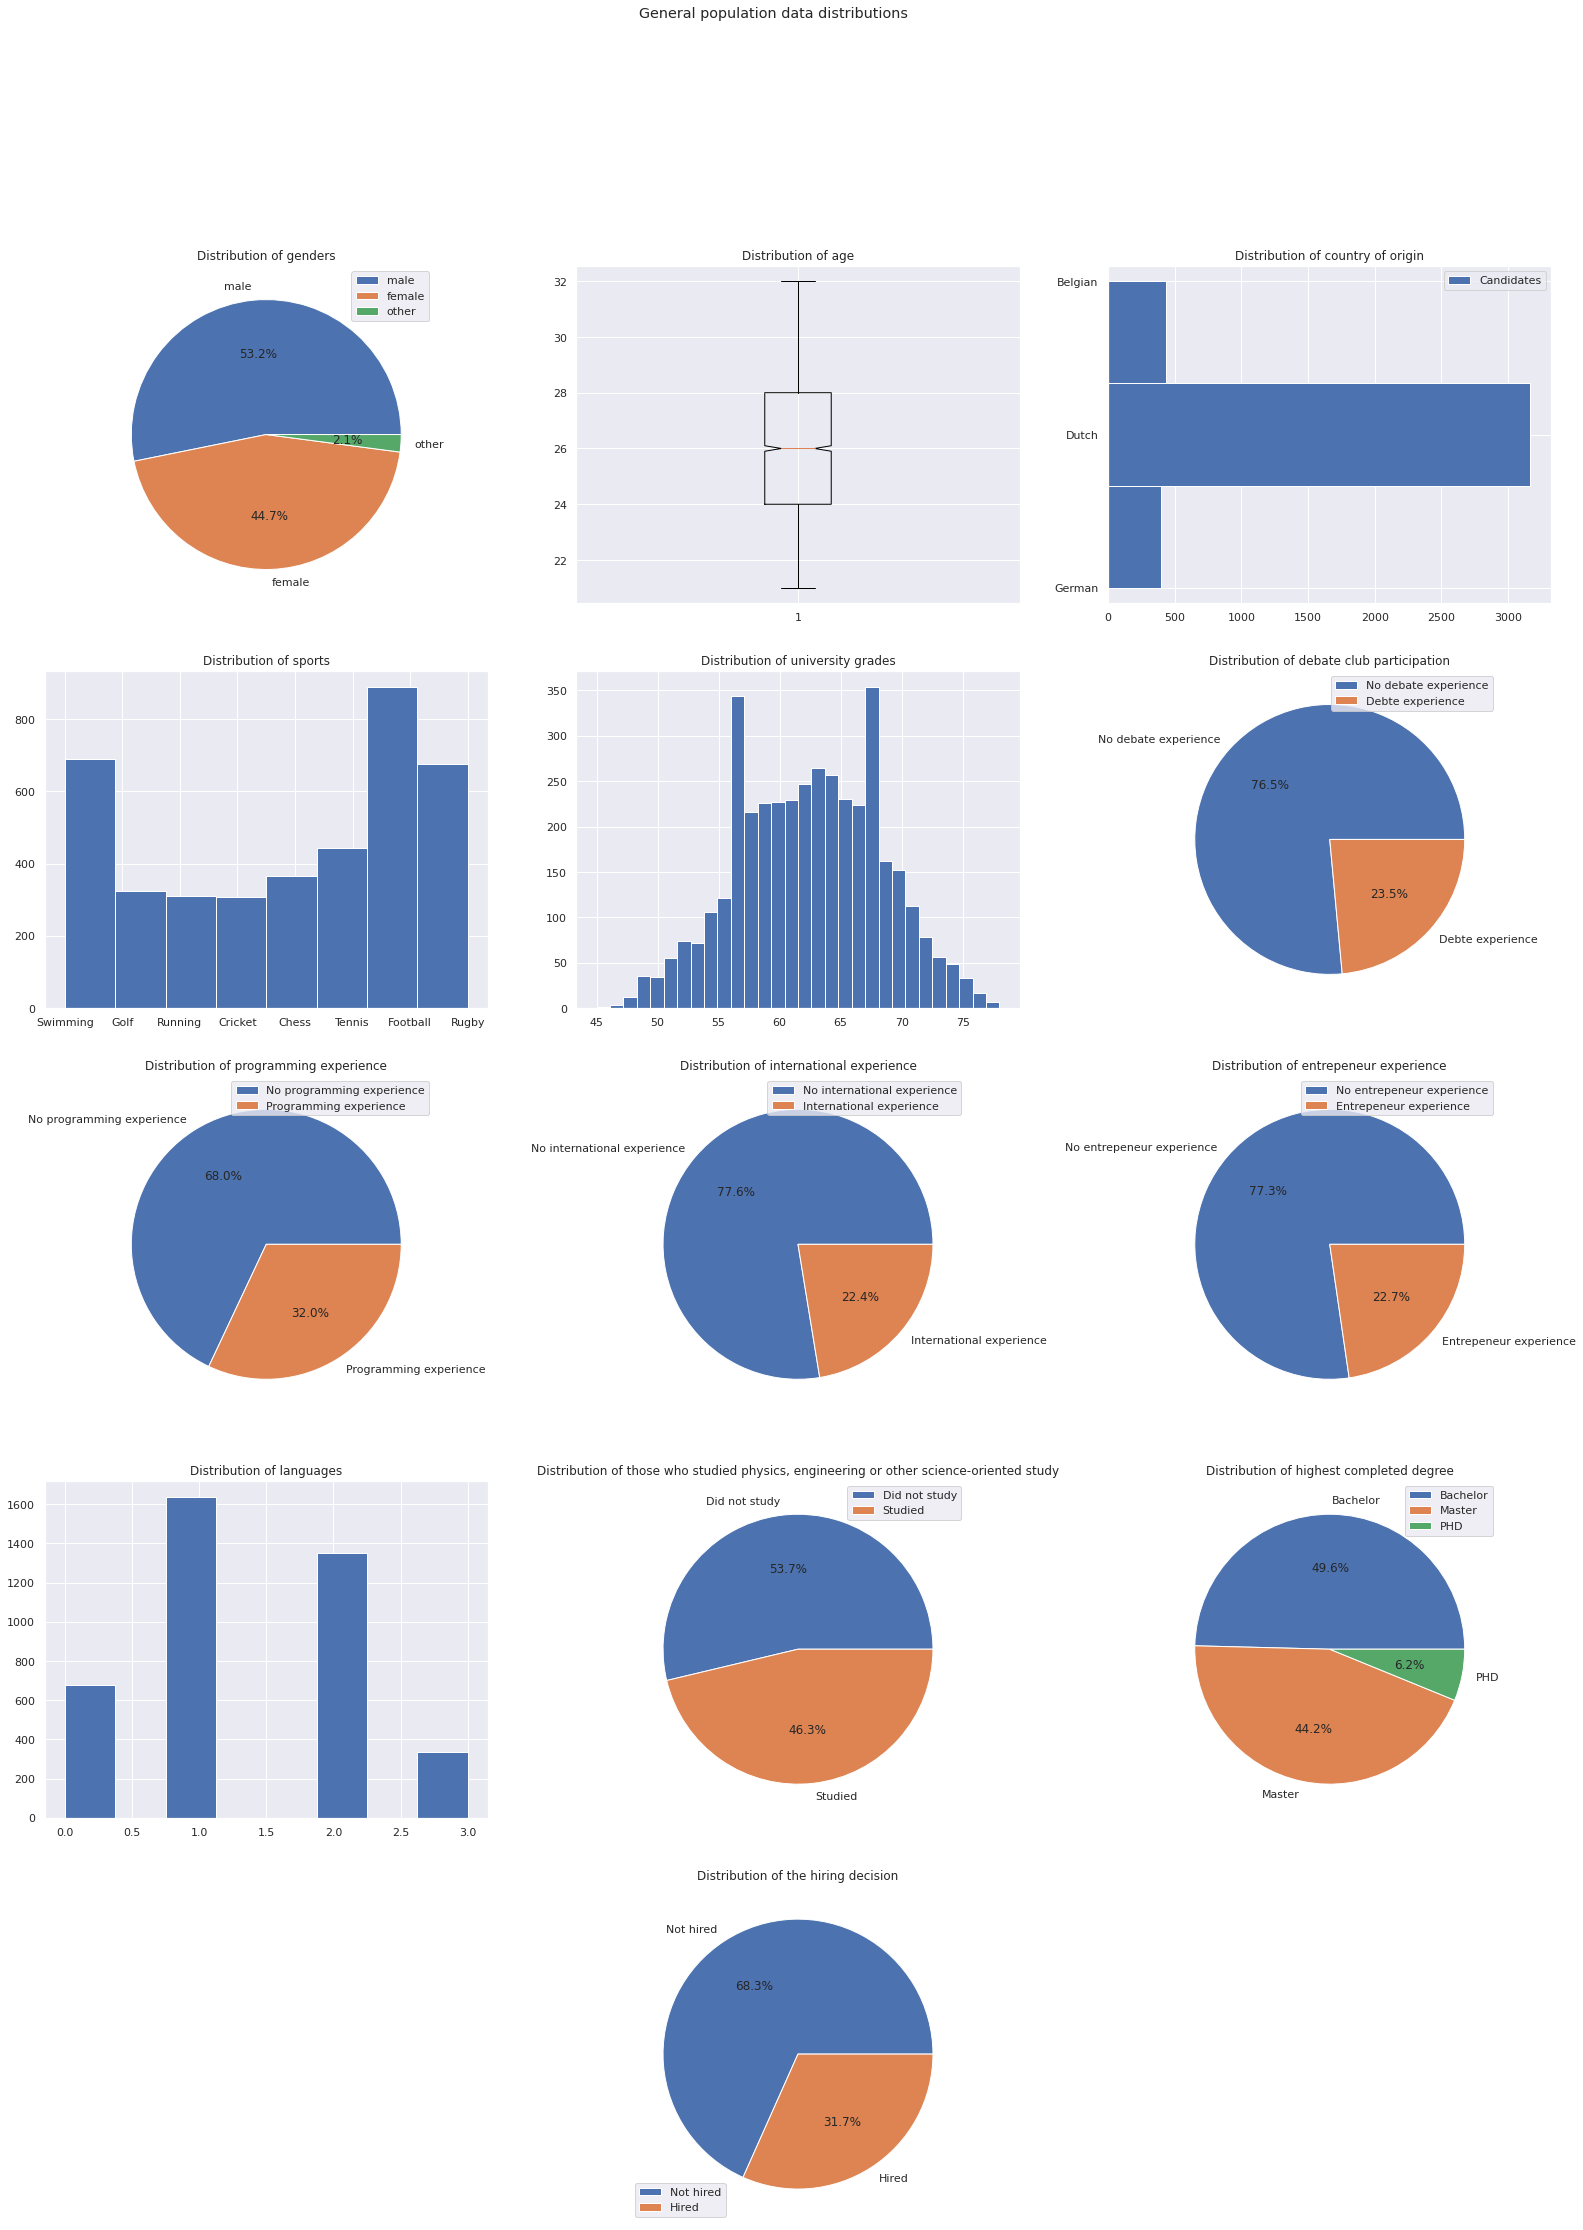

In [215]:
fig, axs = plt.subplots(5,3)
fig.suptitle('General population data distributions')
fig.set_figwidth(27)
fig.set_figheight(36)

axs[0, 0].set_title("Distribution of genders")
axs[0, 0].pie(recruitmentData['gender'].value_counts(), labels = ['male', 'female', 'other'], autopct='%1.1f%%')
axs[0, 0].legend()

axs[0, 1].set_title("Distribution of age")
axs[0, 1].boxplot(recruitmentData['age'], notch = True, showfliers = True)

axs[0, 2].set_title("Distribution of country of origin")
axs[0, 2].hist(recruitmentData['nationality'], label = 'Candidates', bins = 3, orientation='horizontal')
axs[0, 2].legend()

axs[1, 0].set_title("Distribution of sports")
axs[1, 0].hist(recruitmentData['sport'], orientation = 'vertical', bins = 8)

axs[1, 1].set_title("Distribution of university grades")
axs[1, 1].hist(recruitmentData['ind-university_grade'], bins = 30)

axs[1, 2].set_title("Distribution of debate club participation")
axs[1, 2].pie(recruitmentData['ind-debateclub'].value_counts(), labels = ['No debate experience', 'Debte experience'] , autopct='%1.1f%%')
axs[1, 2].legend()

axs[2, 0].set_title("Distribution of programming experience")
axs[2, 0].pie(recruitmentData['ind-programming_exp'].value_counts(), labels = ['No programming experience', 'Programming experience'] , autopct='%1.1f%%')
axs[2, 0].legend()

axs[2, 1].set_title("Distribution of international experience")
axs[2, 1].pie(recruitmentData['ind-international_exp'].value_counts(), labels = ['No international experience', 'International experience'] , autopct='%1.1f%%')
axs[2, 1].legend()

axs[2, 2].set_title("Distribution of entrepeneur experience")
axs[2, 2].pie(recruitmentData['ind-entrepeneur_exp'].value_counts(), labels = ['No entrepeneur experience', 'Entrepeneur experience'] , autopct='%1.1f%%')
axs[2, 2].legend()

axs[3, 0].set_title("Distribution of languages")
axs[3, 0].hist(recruitmentData['ind-languages'], bins = 8, align="mid")

axs[3, 1].set_title("Distribution of those who studied physics, engineering or other science-oriented study")
axs[3, 1].pie(recruitmentData['ind-exact_study'].value_counts(), labels = ['Did not study', 'Studied'] , autopct='%1.1f%%')
axs[3, 1].legend()

axs[3, 2].set_title("Distribution of highest completed degree")
axs[3, 2].pie(recruitmentData['ind-degree'].value_counts(), labels = ['Bachelor', 'Master', 'PHD'] , autopct='%1.1f%%')
axs[3, 2].legend()

axs[4, 0].set_visible(False)
axs[4, 2].set_visible(False)

axs[4, 1].set_title("Distribution of the hiring decision")
axs[4, 1].pie(recruitmentData['decision'].value_counts(), labels = ['Not hired', 'Hired'] , autopct='%1.1f%%')
axs[4, 1].legend()


### 1.2 Hiree descriptor data visualisation and analysis

We start of by visualising the distribution of the descriptors (gender, age, nationality and sport). Firstly, we will compare the distribution of descriptors for hirees of company C and the rest of the hiree population:


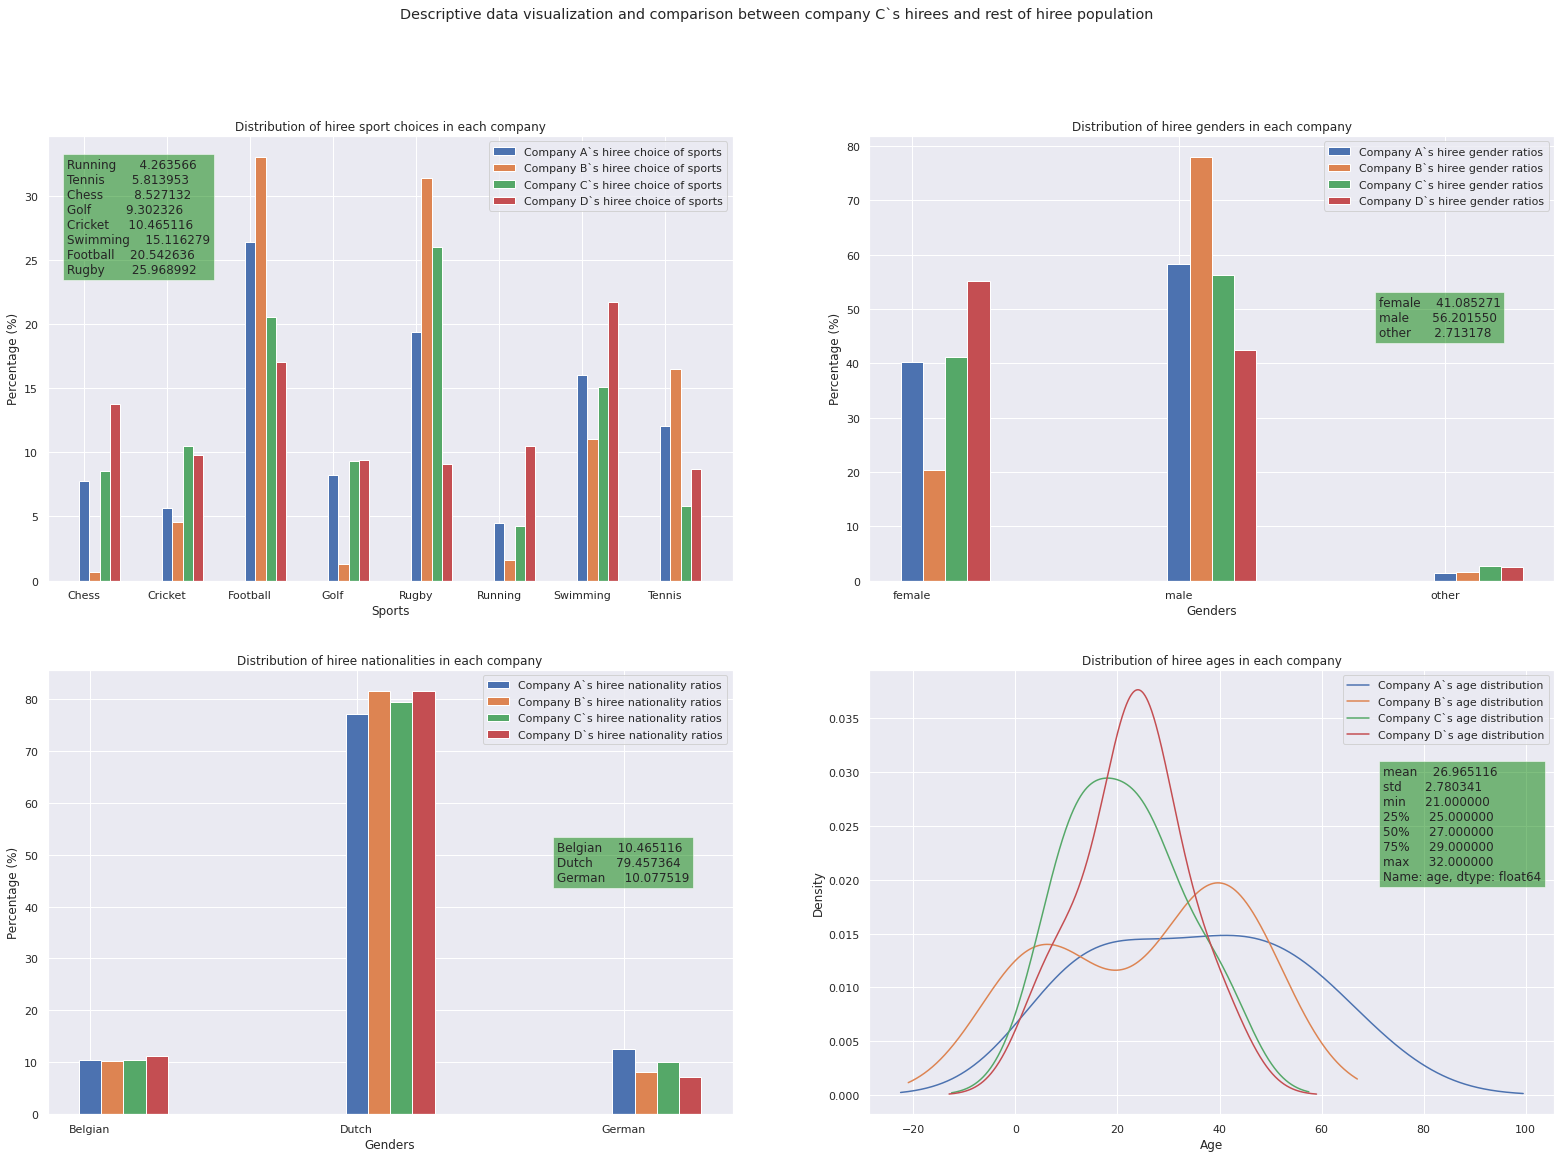

In [216]:
#Parameters used in plot creation
numberOfGenders = recruitmentData['gender'].unique().size
numberOfNationalities = recruitmentData['nationality'].unique().size
numberOfSports = recruitmentData['sport'].unique().size

fig, axs = plt.subplots(2,2)
fig.suptitle('Descriptive data visualization and comparison between company C`s hirees and rest of hiree population')
fig.set_figwidth(27)
fig.set_figheight(18)

#First Plot
XSportsAxis = np.arange(numberOfSports)

for idx, x in enumerate(recruitmentData['company'].unique()):
    sportFrame = recruitmentData.query("decision and company == '" + str(x) + "'")['sport']
    normalizedSportCounts = sportFrame.value_counts().sort_index().divide(sportFrame.count()).multiply(100)
    if (x == 'C'): axs[0, 0].text(-0.2, 24, normalizedSportCounts.sort_values().to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[0, 0].bar(XSportsAxis + idx/numberOfSports, normalizedSportCounts, width= 1/numberOfSports, label='Company ' + str(x) + '`s hiree choice of sports')

axs[0, 0].set_xticks(XSportsAxis)
axs[0, 0].set_xticklabels(recruitmentData['sport'].sort_values().unique().tolist())
axs[0, 0].set_xlabel('Sports')
axs[0, 0].set_ylabel('Percentage (%)')
axs[0, 0].set_title('Distribution of hiree sport choices in each company')
axs[0, 0].legend()

#Second Plot
XGendersAxis = np.arange(numberOfGenders)
for idx, x in enumerate(recruitmentData['company'].unique()):
    genderColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['gender']
    normalizedGenderCounts = genderColumn.value_counts().sort_index().divide(genderColumn.count()).multiply(100)
    if (x == 'C'): axs[0, 1].text(1.75, 45, normalizedGenderCounts.to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[0, 1].bar(XGendersAxis + idx/(numberOfGenders * 4), normalizedGenderCounts, width= 1/(numberOfGenders * 4), label='Company ' + str(x) + '`s hiree gender ratios')

axs[0, 1].set_xticks(XGendersAxis)
axs[0, 1].set_xticklabels(recruitmentData['gender'].sort_values().unique().tolist())
axs[0, 1].set_xlabel('Genders')
axs[0, 1].set_ylabel('Percentage (%)')
axs[0, 1].set_title('Distribution of hiree genders in each company')
axs[0, 1].legend()

#Third Plot
XNationalitiesAxis = np.arange(numberOfNationalities)
for idx, x in enumerate(recruitmentData['company'].unique()):
    nationalityColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['nationality']
    normalizedNationalityCounts = nationalityColumn.value_counts().sort_index().divide(nationalityColumn.count()).multiply(100)
    if (x == 'C'): axs[1, 0].text(1.75, 45, normalizedNationalityCounts.to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[1, 0].bar(XGendersAxis + idx/(numberOfNationalities * 4), normalizedNationalityCounts, width= 1/(numberOfNationalities * 4), label='Company ' + str(x) + '`s hiree nationality ratios')

axs[1, 0].set_xticks(XNationalitiesAxis)
axs[1, 0].set_xticklabels(recruitmentData['nationality'].sort_values().unique().tolist())
axs[1, 0].set_xlabel('Genders')
axs[1, 0].set_ylabel('Percentage (%)')
axs[1, 0].set_title('Distribution of hiree nationalities in each company')
axs[1, 0].legend()

#Fourth Plot
for idx, x in enumerate(recruitmentData['company'].unique()):
    ageColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['age']
    if (x == 'C'): axs[1, 1].text(72, 0.02, str(ageColumn.describe()[1:8]), bbox=dict(facecolor='green', alpha=0.5))
    axs[1, 1] = ageColumn.value_counts().plot(kind='density', label='Company ' + str(x) + '`s age distribution')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Density')
axs[1, 1].set_title('Distribution of hiree ages in each company')
axs[1, 1].legend()


#### Descriptor analysis based on the plots above:

- In the first graph we can observe that for our company, the most practiced sport is Rugby (26% of the population) followed by Football (20.5% of the population) and then Swimming (15% of the population). Apart from these 3 sports, the other ones are significantly less practiced.

- In the second graph we can observe that the majority of the hirees for our company resembles the distribution of the other companies with male candidates representing the majority of hirees (56% of the candidates) but we can observe that, in comparison to company B's distribution, ours is way more evenly balanced.

- In the third graph we can observe that the distributions in terms of hiree nationalities is fairly the same for all companies which could signal that nationality as a feature could not be that impactful.

- Lastly, in the fourth graph we can observe that our company's hiree ages lean more towards an average age of 27 years old, the oldest hiree being 32 and the youngest being 21.

### 1.3 Hiree/Rejectee descriptor data visualisation and analysis

In the following section we will visualize the differences between all applicants for our company and the distributions of actual hirees.


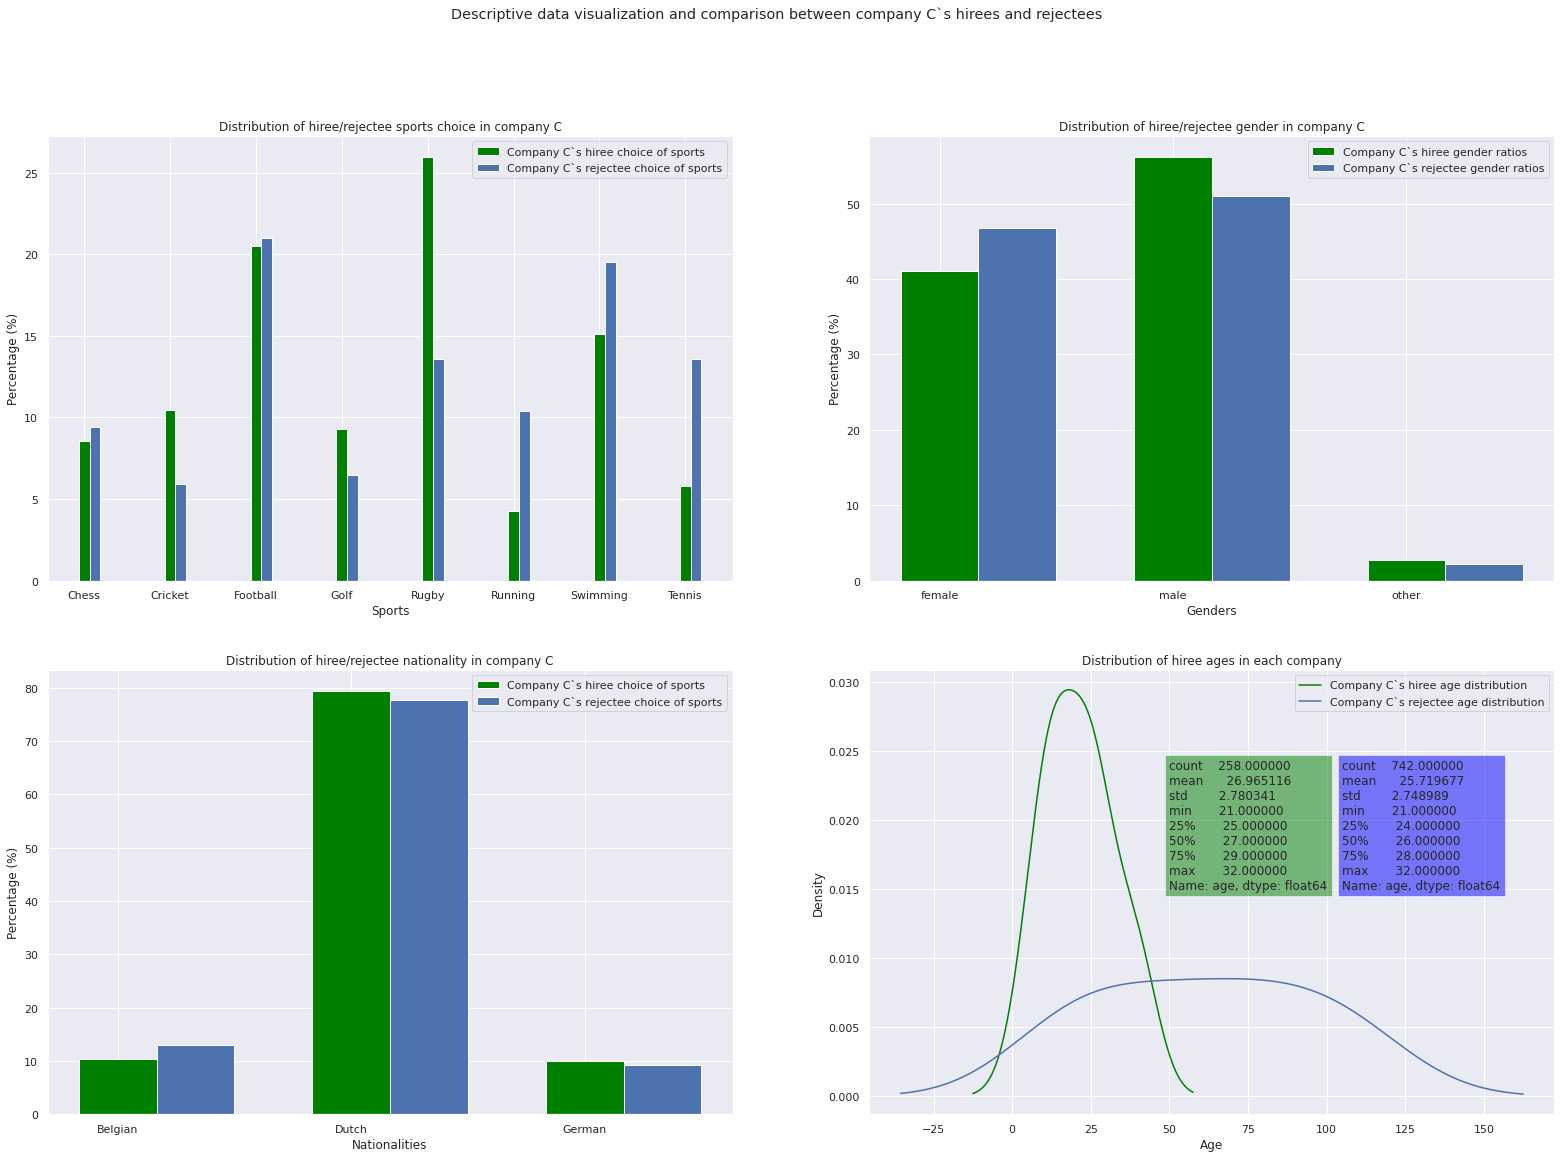

In [217]:
from turtle import color


fig, axs = plt.subplots(2,2)
fig.suptitle('Descriptive data visualization and comparison between company C`s hirees and rejectees')
fig.set_figwidth(27)
fig.set_figheight(18)

#Dataframe of interest
descriptorHireeDF = pd.DataFrame(recruitmentData.query("company == 'C' and decision"), columns=['age','gender','sport','nationality'])
descriptorRejecteeDF = pd.DataFrame(recruitmentData.query("company == 'C' and not decision"), columns=['age','gender','sport','nationality'])

#First plot
normalizedSportCountsHiree = descriptorHireeDF['sport'].value_counts().sort_index().divide(descriptorHireeDF['sport'].count()).multiply(100)
normalizedSportCountsRejectee = descriptorRejecteeDF['sport'].value_counts().sort_index().divide(descriptorRejecteeDF['sport'].count()).multiply(100)
axs[0, 0].bar(XSportsAxis, normalizedSportCountsHiree, width= 1/numberOfSports, label='Company C`s hiree choice of sports',color='green')
axs[0, 0].bar(XSportsAxis + 1/numberOfSports, normalizedSportCountsRejectee, width= 1/numberOfSports, label='Company C`s rejectee choice of sports')
axs[0, 0].set_xticks(XSportsAxis)
axs[0, 0].set_xticklabels(recruitmentData['sport'].sort_values().unique().tolist())
axs[0, 0].set_xlabel('Sports')
axs[0, 0].set_ylabel('Percentage (%)')
axs[0, 0].set_title('Distribution of hiree/rejectee sports choice in company C')
axs[0, 0].legend()

#Second plot
normalizedGenderCountsHiree = descriptorHireeDF['gender'].value_counts().sort_index().divide(descriptorHireeDF['gender'].count()).multiply(100)
normalizedGenderCountsRejectee = descriptorRejecteeDF['gender'].value_counts().sort_index().divide(descriptorRejecteeDF['gender'].count()).multiply(100)
axs[0, 1].bar(XGendersAxis, normalizedGenderCountsHiree, width= 1/numberOfGenders, label='Company C`s hiree gender ratios',color='green')
axs[0, 1].bar(XGendersAxis + 1/numberOfGenders, normalizedGenderCountsRejectee, width= 1/numberOfGenders, label='Company C`s rejectee gender ratios')
axs[0, 1].set_xticks(XGendersAxis)
axs[0, 1].set_xticklabels(recruitmentData['gender'].sort_values().unique().tolist())
axs[0, 1].set_xlabel('Genders')
axs[0, 1].set_ylabel('Percentage (%)')
axs[0, 1].set_title('Distribution of hiree/rejectee gender in company C')
axs[0, 1].legend()

#Fifth plot
normalizedNationalityCountsHiree = descriptorHireeDF['nationality'].value_counts().sort_index().divide(descriptorHireeDF['nationality'].count()).multiply(100)
normalizedNationalityCountsRejectee = descriptorRejecteeDF['nationality'].value_counts().sort_index().divide(descriptorRejecteeDF['nationality'].count()).multiply(100)
axs[1, 0].bar(XNationalitiesAxis, normalizedNationalityCountsHiree, width= 1/numberOfNationalities, label='Company C`s hiree choice of sports',color='green')
axs[1, 0].bar(XNationalitiesAxis + 1/numberOfNationalities, normalizedNationalityCountsRejectee, width= 1/numberOfNationalities, label='Company C`s rejectee choice of sports')
axs[1, 0].set_xticks(XNationalitiesAxis)
axs[1, 0].set_xticklabels(recruitmentData['nationality'].sort_values().unique().tolist())
axs[1, 0].set_xlabel('Nationalities')
axs[1, 0].set_ylabel('Percentage (%)')
axs[1, 0].set_title('Distribution of hiree/rejectee nationality in company C')
axs[1, 0].legend()

#Ninth plot
axs[1, 1] = descriptorHireeDF['age'].value_counts().plot(kind='density', label='Company C`s hiree age distribution',color='green')
axs[1, 1] = descriptorRejecteeDF['age'].value_counts().plot(kind='density', label='Company C`s rejectee age distribution')
axs[1, 1].text(50, 0.015, str(descriptorHireeDF['age'].describe()[0:8]), bbox=dict(facecolor='green', alpha=0.5))
axs[1, 1].text(105, 0.015, str(descriptorRejecteeDF['age'].describe()[0:8]), bbox=dict(facecolor='blue', alpha=0.5))
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Density')
axs[1, 1].set_title('Distribution of hiree ages in each company')
axs[1, 1].legend()